## Exercise: Neural Networks

Create a simple neural network example in an AWS SageMaker notebook. We'll use a synthetic dataset to predict whether a customer will make a purchase based on two features:

- Website visit duration
- Number of pages visited.

This is a binary classification problem, and we'll use a small neural network for quick execution.

In [1]:
# Import libraries 
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')


In [2]:
# Generating synthetic data
np.random.seed(0)
data_size = 200
features = np.random.rand(data_size, 2)  # Two features: visit duration and pages visited
labels = (features[:, 0] + features[:, 1] > 1).astype(int)  # Purchase (1) or not (0)

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(features, columns=['VisitDuration', 'PagesVisited'])
df['Purchase'] = labels

In [3]:
# Convert to DataFrame for easier manipulation
df = pd.DataFrame(features, columns=['VisitDuration', 'PagesVisited'])
df['Purchase'] = labels

In [4]:
#Preprocess the data 
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df[['VisitDuration', 'PagesVisited']], df['Purchase'], test_size=0.2, random_state=42)

In [5]:
# Build and Train Neural Network 

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(10, activation='relu', input_shape=(2,)),  # Input layer with 2 features
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=10)

2024-03-13 01:47:50.235879: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-13 01:48:01.952491: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-03-13 01:48:17.682267: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Epoch 1/10
16/16 [==============================] - 2s 2ms/step - loss: 0.6871 - accuracy: 0.4563
Epoch 2/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6809 - accuracy: 0.5312
Epoch 3/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6746 - accuracy: 0.6062
Epoch 4/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6669 - accuracy: 0.6750
Epoch 5/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6592 - accuracy: 0.7125
Epoch 6/10
16/16 [==============================] - 0s 1ms/step - loss: 0.6527 - accuracy: 0.7312
Epoch 7/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6462 - accuracy: 0.7375
Epoch 8/10
16/16 [==============================] - 0s 1ms/step - loss: 0.6403 - accuracy: 0.7563
Epoch 9/10
16/16 [==============================] - 0s 1ms/step - loss: 0.6343 - accuracy: 0.7875
Epoch 10/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6281 - accuracy: 0.7875


In [6]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

2/2 [==============================] - 0s 5ms/step - loss: 0.6160 - accuracy: 0.8250
Test Accuracy: 0.824999988079071


-----------------------------------------------------------------

### Visualize the decision process behind the model 

In the context of the neural network exercise for predicting customer purchase behavior, "model accuracy" and "model loss" are two important metrics used to evaluate the performance of the model. Here's a concise explanation of each:

Model Accuracy is the fraction of predictions our model got right. In the context of the exercise, it is the proportion of correctly predicted purchase decisions (both purchases and non-purchases) out of all predictions made.
Formula - Accuracy = (Number of Correct Predictions) / (Total Number of Predictions)
Interpretation - a higher accuracy indicates a better performing model. For example, an accuracy of 0.90 means that 90% of the model's predictions are correct.
Model Loss measures how far the model's predictions are from the actual class labels. It is a measure of the model's error.
Binary Cross-Entropy - is commonly used in binary classification tasks. It calculates the loss for each instance by comparing the predicted probability with the actual label (either 0 or 1), and then takes the average over all instances.
Interpretation - lower loss values are better, indicating that the model's predictions are closer to the actual labels. A high loss value means the model's predictions are far off from the actual labels.

Epoch 1/10
13/13 [==============================] - 0s 8ms/step - loss: 0.6285 - accuracy: 0.7734 - val_loss: 0.5966 - val_accuracy: 0.8438
Epoch 2/10
13/13 [==============================] - 0s 4ms/step - loss: 0.6238 - accuracy: 0.7812 - val_loss: 0.5920 - val_accuracy: 0.8438
Epoch 3/10
13/13 [==============================] - 0s 5ms/step - loss: 0.6191 - accuracy: 0.7969 - val_loss: 0.5861 - val_accuracy: 0.8438
Epoch 4/10
13/13 [==============================] - 0s 3ms/step - loss: 0.6143 - accuracy: 0.7969 - val_loss: 0.5805 - val_accuracy: 0.8438
Epoch 5/10
13/13 [==============================] - 0s 4ms/step - loss: 0.6097 - accuracy: 0.7969 - val_loss: 0.5746 - val_accuracy: 0.8438
Epoch 6/10
13/13 [==============================] - 0s 5ms/step - loss: 0.6050 - accuracy: 0.8125 - val_loss: 0.5685 - val_accuracy: 0.8125
Epoch 7/10
13/13 [==============================] - 0s 5ms/step - loss: 0.6001 - accuracy: 0.8125 - val_loss: 0.5624 - val_accuracy: 0.8438
Epoch 8/10
13/13 [==

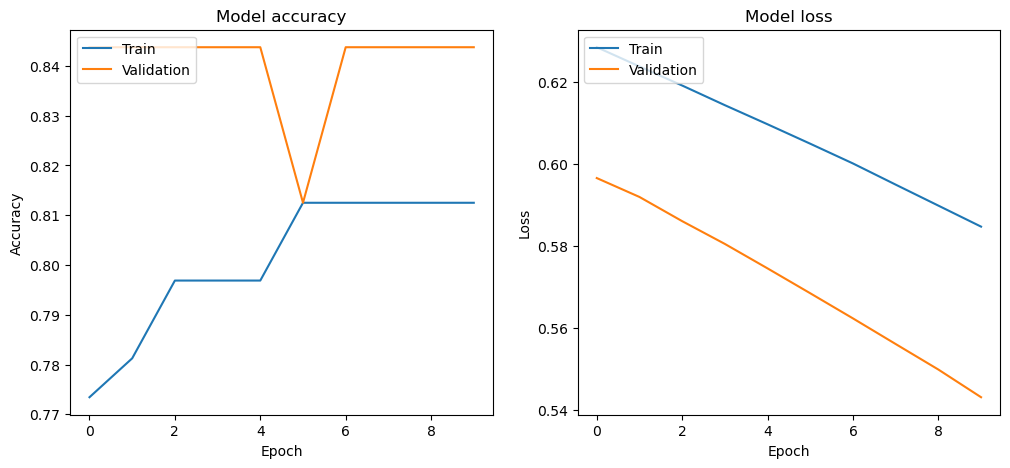

In [7]:

#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Train the model and save the history
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2)

# Plotting training and validation loss and accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [8]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

2/2 [==============================] - 0s 6ms/step - loss: 0.5675 - accuracy: 0.8500
Test Accuracy: 0.8500000238418579


------------------------------------------------------

## Decision Boundry

The Decision Boundary is a boundary in the feature space that separates the data points into different classes based on the predictions made by the model. In our exercise, we have two input features: website visit duration and number of pages visited. The decision boundary will be a line or curve in this 2-dimensional space that separates the points predicted to make a purchase (class 1) from those predicted not to make a purchase (class 0).

313/313 [==============================] - 0s 1ms/step


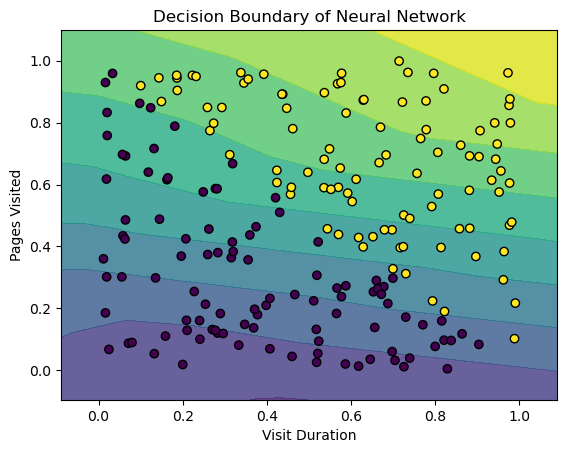

In [9]:
# Generate a grid over the feature space
x_min, x_max = df['VisitDuration'].min() - 0.1, df['VisitDuration'].max() + 0.1
y_min, y_max = df['PagesVisited'].min() - 0.1, df['PagesVisited'].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict over the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour and training examples
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(df['VisitDuration'], df['PagesVisited'], c=df['Purchase'], edgecolor='k')
plt.xlabel('Visit Duration')
plt.ylabel('Pages Visited')
plt.title('Decision Boundary of Neural Network')
plt.show()

## Insight 

- Visualizations are more about understanding the model's structure and learning process rather than explaining its decision-making process in detail, which is more straightforward with models like decision trees.

----------------------------------------------------------

- The decision boundary in our neural network example serves as a visual tool to understand how the model differentiates between customers likely to make a purchase and those who are not, based on their website engagement metrics.